# <u>Name :</u> ADVAIT GURUNATH CHAVAN
# <u>Email ID:</u> advaitchavan135@gmail.com
# CDAC PGDAI DATA ANALYTICS ASSIGNMENT_11

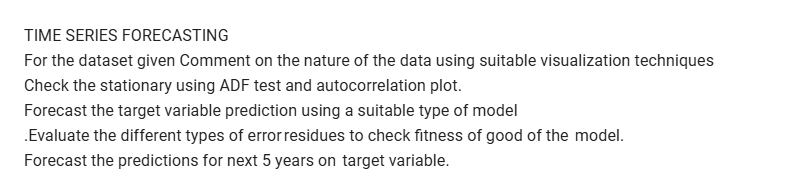

# Step 1: Import libraries

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore") 

# Step 2: Load the dataset

In [2]:
df = pd.read_csv("monthly_milk_production.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        168 non-null    object
 1   Production  168 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [4]:
# Convert 'Date' column to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
df.set_index('Date', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Production  168 non-null    int64
dtypes: int64(1)
memory usage: 2.6 KB


In [6]:
df.describe()

,Production
count,168.000000
mean,754.708333
std,102.204524
min,553.000000
25%,677.750000
50%,761.000000
75%,824.500000
max,969.000000


In [15]:
# Create a 'Time' feature (as a simple numeric index)
df["Time"] = np.arange(len(df))

In [21]:
df["Month"] = df.index.strftime("%b")

# Step 3: Exploratory Data Analysis (EDA)

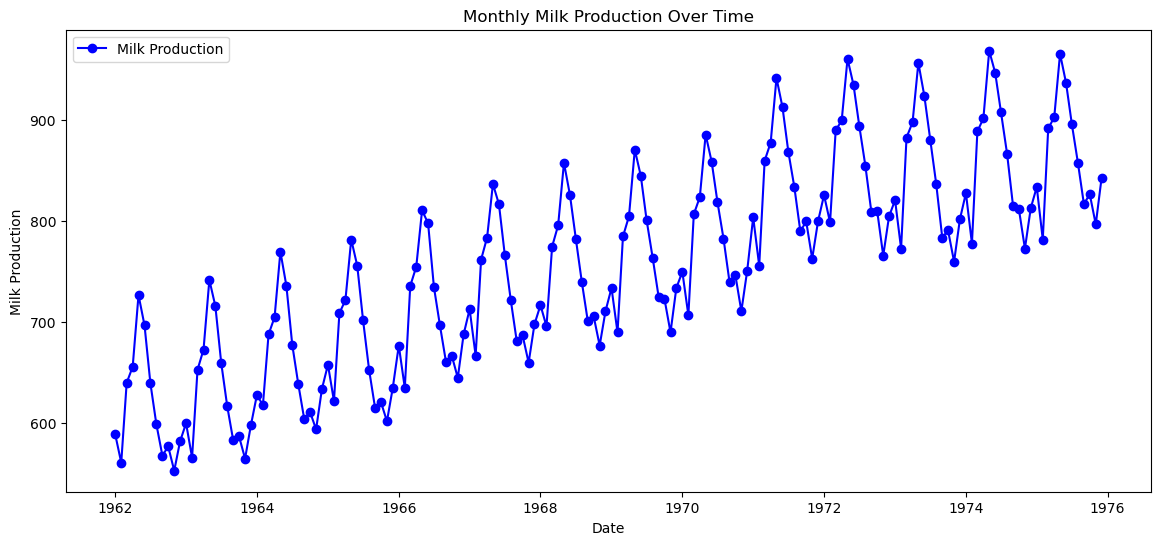

In [30]:
# 1. Line Plot: Overall Trend and Seasonality
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Production'], marker='o', color='blue', label='Milk Production')
plt.title("Monthly Milk Production Over Time")
plt.xlabel("Date")
plt.ylabel("Milk Production")
plt.legend()
plt.show()

### The production data shows an upward trend over the 14-year period, suggesting growth in production or increased operational capacities.

### Line Plot for Overall Trend and Seasonality
### A simple line plot of the production data over time provides a first glance. This plot reveals:

### Trend: A gradual upward movement over the years, indicating that milk production has been increasing.

### Seasonality: There is a noticeable repeating pattern each year—for example, production peaks in certain months and dips in others, suggesting an annual seasonal cycle.

# Step 4: Stationarity Testing

In [17]:
result = adfuller(df['Production'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
if result[1] < 0.05:
    print("The series is likely stationary.")
else:
    print("The series is likely non-stationary. Consider differencing or a transformation.")

ADF Statistic: -1.303812
p-value: 0.627427
The series is likely non-stationary. Consider differencing or a transformation.


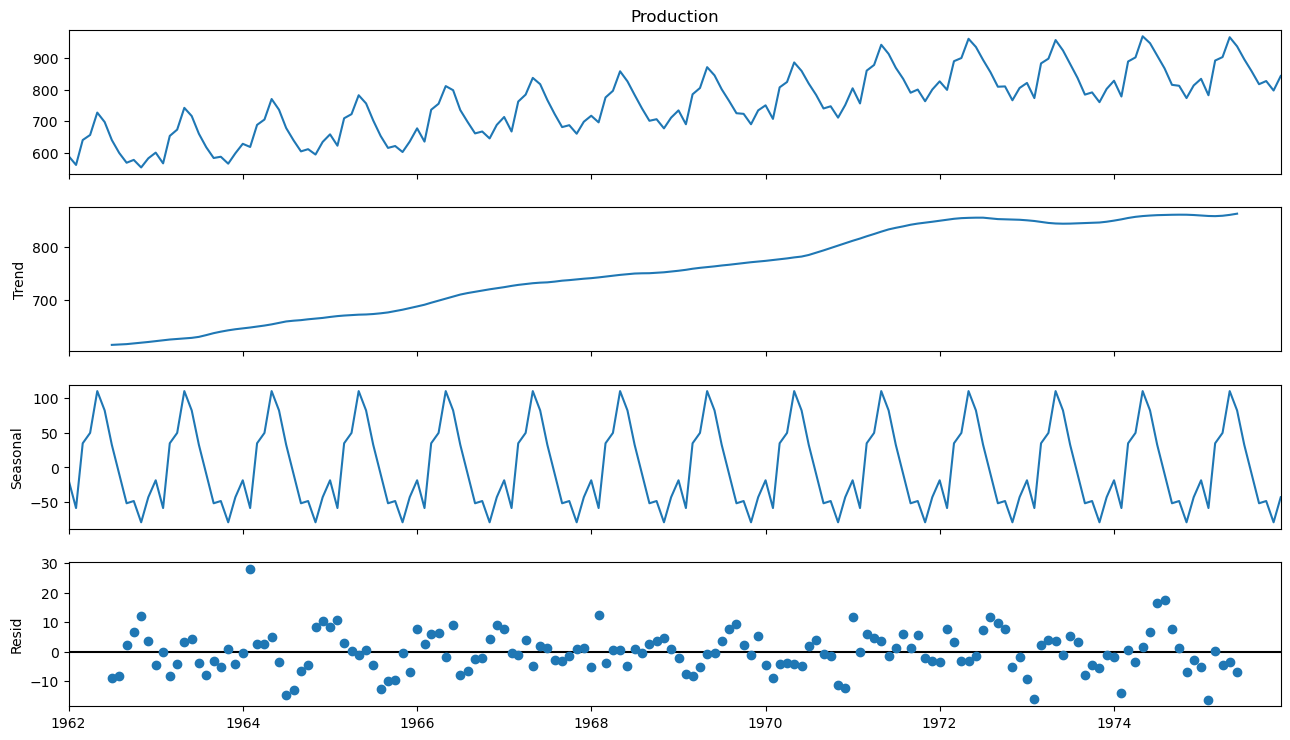

In [18]:
# Decompose the series into trend, seasonal, and residual components (period=12 for monthly data)
decomposition = seasonal_decompose(df['Production'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.show()

### Overall Trend: The production data shows an upward trend over the 14-year period, suggesting growth in production or increased operational capacities.

### Seasonality: There is a strong recurring seasonal pattern that repeats every year. Specifically, some months consistently show higher production while others are lower.

### Residual Variability: Once the trend and seasonality are removed (as seen in the decomposition), the remaining noise is relatively modest, indicating that the main behavioral patterns are well-captured by these two components.

### Decomposition Plot
### Using a seasonal decomposition (for instance, via STL), you can break the time series into three components:

### Trend Component: Captures the long-term increase in production.

### Seasonal Component: Shows the periodic fluctuations within each year.

### Residual Component: Highlights the random variability after removing trend and seasonality.

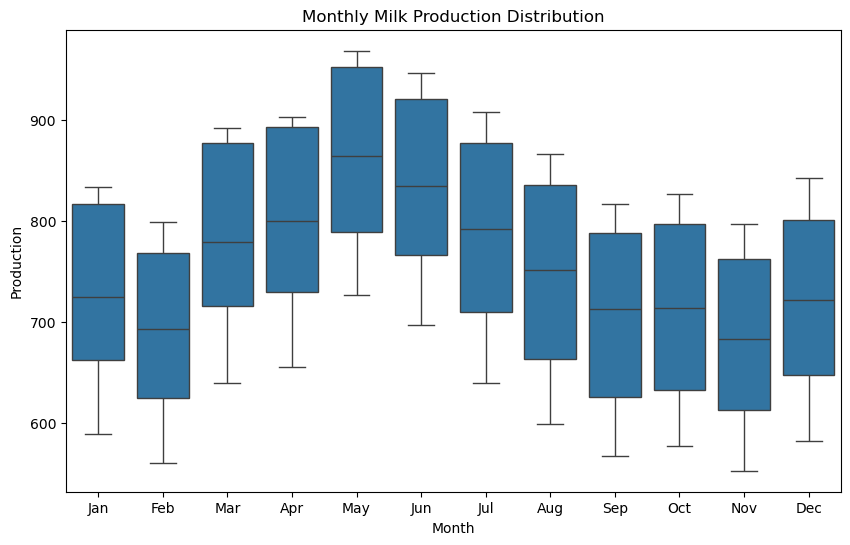

In [33]:
df['Month'] = df.index.strftime("%b")
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Month'], y=df['Production'], 
            order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Monthly Milk Production Distribution")
plt.xlabel("Month")
plt.ylabel("Production")
plt.show()

### Seasonal Subseries (Box) Plot
### A box plot grouped by the month of the year is very effective in visualizing the seasonal effects:

### Monthly Distributions: It shows how production in each calendar month varies. You might observe that certain months consistently produce higher yields (e.g., May) compared to other months (e.g., November).

### Variability: The spread within each month gives insight into the variability around the seasonal pattern.

# Step 5: Visualize Autocorrelation and Partial Autocorrelation

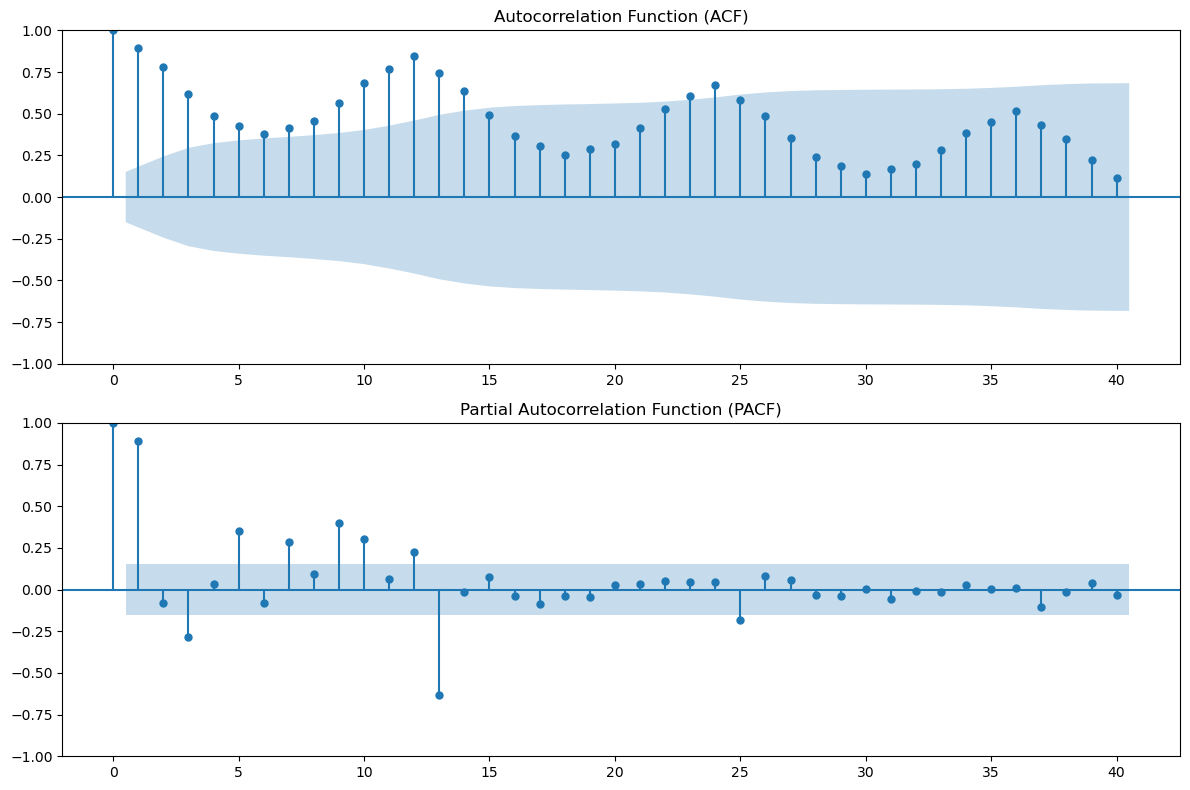

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['Production'], lags=40, ax=ax[0])
plot_pacf(df['Production'], lags=40, ax=ax[1])
ax[0].set_title("Autocorrelation Function (ACF)")
ax[1].set_title("Partial Autocorrelation Function (PACF)")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

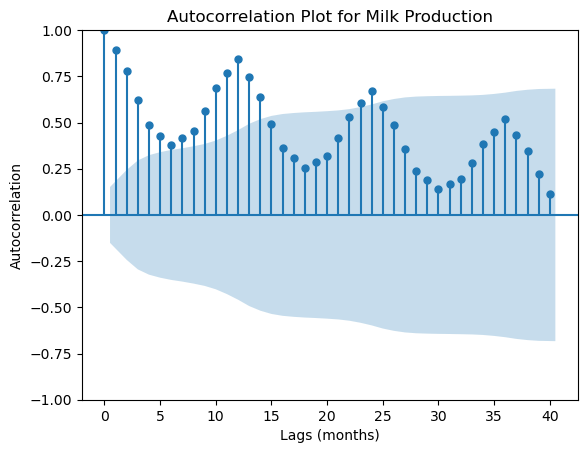

In [34]:
plt.figure(figsize=(10, 6))
plot_acf(df['Production'], lags=40)
plt.title("Autocorrelation Plot for Milk Production")
plt.xlabel("Lags (months)")
plt.ylabel("Autocorrelation")
plt.show()

### Autocorrelation: The significant spikes at lag 12 in the ACF plot confirm annual seasonality, implying that the production in a given month is statistically related to that of the same month in previous years.

### Autocorrelation Plot (ACF)
### Plotting the autocorrelation function reveals:

### Seasonal Lag: Significant autocorrelations at lag 12 (and its multiples) confirm that the current month's production is strongly related to the production in the same month of previous years.

### Data Memory: This repeated correlation pattern further attests to the seasonality inherent in the data.

# Step 6: Fit a Model

In [22]:
model = smf.ols(formula="Production ~ Time + C(Month)", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Production   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     544.9
Date:                Wed, 07 May 2025   Prob (F-statistic):          4.55e-120
Time:                        20:02:37   Log-Likelihood:                -698.90
No. Observations:                 168   AIC:                             1424.
Df Residuals:                     155   BIC:                             1464.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         660.1227      4.792    1

# Step 7: Forecasting for the Next 5 Years (60 Months)

In [25]:
last_time = df["Time"].iloc[-1]

In [26]:
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=60, freq="MS")

In [27]:
future_df = pd.DataFrame(index=future_dates)
future_df["Time"] = np.arange(last_time + 1, last_time + 1 + 60)
future_df["Month"] = future_df.index.strftime("%b")

In [28]:
future_df["Forecast"] = model.predict(future_df)

# Step 8: Plot the Historical Data and Forecasted Values

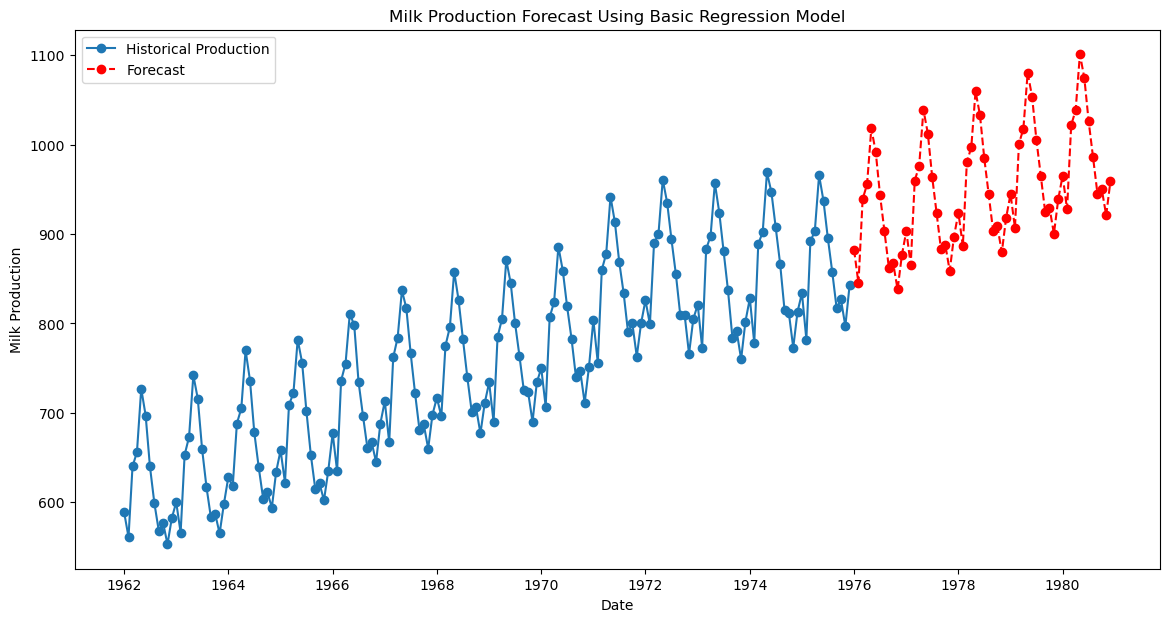

In [29]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df["Production"], label="Historical Production", marker="o")
plt.plot(future_df.index, future_df["Forecast"], label="Forecast", color="red", marker="o", linestyle="--")
plt.title("Milk Production Forecast Using Basic Regression Model")
plt.xlabel("Date")
plt.ylabel("Milk Production")
plt.legend()
plt.show()